## Lesson 6 - Pretrained Model
 - 이번 실습 자료에서는 강의시간에 다루었던 torchvision 을 사용하여 pretrained 모델을 사용하는 방법에 대해 실습하겠습니다.
 - torchvision 의 pretrained model 리스트는 다음과 같습니다
 
 [List of torchvision models](https://github.com/pytorch/vision/blob/master/torchvision/models/__init__.py#L1-L14)
```
from .alexnet import *
from .resnet import *
from .vgg import *
from .squeezenet import *
from .inception import *
from .densenet import *
from .googlenet import *
from .mobilenet import *
from .mnasnet import *
from .shufflenetv2 import *
from . import segmentation
from . import detection
from . import video
from . import quantization
```

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

#### 가장 기본이라고 할 수 있는 Alextnet 모델 아키텍쳐를 사용해보겠습니다.

In [4]:
from torchvision.models import alexnet
model = alexnet()
model # model.__repr__ ? __repre__는 객체의 공식적인 정보를, __str__은 비공식적인 정보를 출력함.


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### Alexnet 의 pretrained 버전 또한 쉽게 불러올 수 있습니다.

In [5]:
model = alexnet(pretrained=True) # default 값으로는 false로 되어 있음
model

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /opt/ml/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### torchvision 에서 해당 모델을 어떤 식으로 구현하였는지 직접 확인해보면 매우 도움이 많으 됩니다.
Example:
[source code](https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py#L15-L50)
```
class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1) # classifier 하기 전에 flatten하게 만들어 주네
        x = self.classifier(x)
        return x
```

#### 다른 모델들( e.g. vgg19, resnet18) 도 같은 방법으로 손 쉽게 사용할 수 있습니다.

In [6]:
from torchvision.models import vgg19_bn
model = vgg19_bn(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /opt/ml/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#### Pretrained 모델을 내 태스크에 맞게 어떻게 사용할 수 있나요?
 - Trochvision 모델들은 보통 feature-extraction 파트, task-specific 파트로 크게 두 가지로 구성되어 있습니다.
 - Task specific 파트는 모델의 태스크(이미지 분류, 객체 인식 등) 에 따라 모두 다릅니다.
 - 심지어 같은 이미지 분류 안에서도, 어떤 데이터셋으로 pretrain 하였느냐에 따라 다를 수 있습니다.
 - 따라서, 우리도 우리 테스크에 맞게 task specific 파트는 새로 정의하여 사용하여야 합니다.

 - 주로 이미지넷 데이터셋을 사용하여 pretrain 을 하기에 output_dim=1000 인 경우가 많습니다.
 - 따라서 우리 태스크의 클래스 갯수(18)에 맞게 재정의하여 사용할 수 있습니다.

In [9]:
num_classes = 18
model = vgg19_bn(pretrained=True)
model.classifier = nn.Sequential( # classifier를 따로 만들어서 overwriting을 하는 식으로 함.
    nn.Linear(512 * 7 * 7, 4096),
    nn.ReLU(True), # inplace=True -> inplace: can optionally do the operation in-place. Default: ``False``
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, num_classes),
)

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#### Weight Freeze
 - Weight freeze 란 해당 모듈의 graident 는 역전파 하지 않아 학습을 하지 않는다는 의미입니다.
 - 예를 들어, 우리가 하려는 태스크가 pretrain 한 태스크와 매우 유사하다면, feature 파트는 freeze 하여 학습하지 않고 새로 정의한 task specific 파트만 학습하는 것이 좋은 방법일 수 있습니다.
 - weight freeze 는 `requires_grad` 를 사용하여 쉽게 구현할 수 있습니다. 

In [10]:
# feature 파트만 freeze
model.features.requires_grad_(False) # self.feature 안에 있는 모든 것들을 한 번에 requires_grad_(False) 로 만듦. 다른 것은 그대로 True임.
for param, weight in model.named_parameters():
    print(f"파라미터 {param:20} 가 gradient 를 tracking 하나요? -> {weight.requires_grad}")

파라미터 features.0.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.0.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.1.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.1.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.3.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.3.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.4.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.4.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.7.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.7.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.8.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.8.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.10.weight   가 gradient 를 tracking 하나요? -> False
파라미터 features.10.bias     가 gradient 를 tracking 하나요? -> False
파라미터 features.11.weight   가 gradient 를 tracking 하나요? -> False
파라미터 features.11.bias     가 gradient 를 tracking 하나요? -> False
파라미터 fea

#### Weight initialization 
 - weight 초기화는 종종 모델의 성능에 critical 한 영향을 줍니다.
 - 하지만 만약 pretrained 모델을 사용한다면 pretrained 부분은 초기화를 하지 말고, 재정의한 task specific 파트만 초기화하여야 합니다.

In [11]:
import torch.nn.init as init

def initialize_weights(model):
    """
    Xavier uniform 분포로 모든 weight 를 초기화합니다.
    더 많은 weight 초기화 방법은 다음 문서에서 참고해주세요. https://pytorch.org/docs/stable/nn.init.html
    """
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            init.xavier_uniform_(m.weight.data) # 내가 알기로는 어떤 활성화함수를 쓰느냐에 따라, 초기화 하는 방법이 달라짐. 분포을 균등하게 만들어주기 위해
            if m.bias is not None:
                m.bias.data.zero_() # bias는 대부분 0으로 초기화하는 듯?
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 0.01)
            m.bias.data.zero_()

#### pretrained 모델을 가져와 가장 앞단 layer 의 weight 분포를 봐봅시다

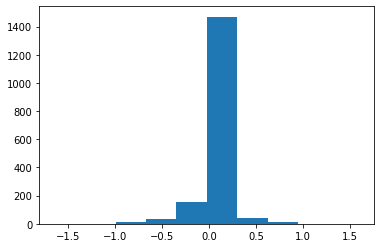

In [17]:
import matplotlib.pyplot as plt

model = vgg19_bn(pretrained=True)

# Weight Initialization 이전 모델 feature 파트의 첫번째 weight 분포
plt.hist(model.features[0].weight.detach().numpy().reshape(-1)) # detach : Returns a new Tensor, detached from the current graph.
                                                                # gradient 전파가 안되는 텐서를 만듦
                                                                # reshape(-1) : 1차원으로 만듦
plt.show()

#### weight 초기화 후 분포를 봐 봅시다
 - `xavier_uniform` 으로 초기화하여 웨이트들이 uniform 한 분포를 가지게 되었습니다.

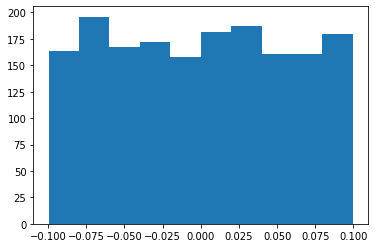

In [18]:
model = vgg19_bn(pretrained=True)

# 모든 weight 를 initialize
initialize_weights(model.features) # 함수를 짜서 긱 layer의 특성에 맞게 초기화하는 방법을 달리 줌.

# Weight Initialization 이후 모델 feature 파트의 첫번째 weight 분포
# (xavier) uniform 한 분포로 바뀐 것을 확인할 수 있습니다.
plt.hist(model.features[0].weight.detach().numpy().reshape(-1))
plt.show()

#### task specific 한 부분만 초기화하엿습니다
 - feature extraction 파트는 초기화가 되지 않은 것은 확인할 수 있습니다.

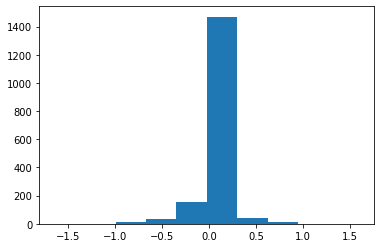

In [19]:
model = vgg19_bn(pretrained=True)

# Classifier 부분만 initialize
initialize_weights(model.classifier)

# Weight Initialization 이후 모델 feature 파트의 첫번째 weight 분포
# classifier 부분만 xavier uniform 으로 초기화해서 feature 파트는 uniform 한 분포를 가지지 않는 것을 확인할 수 있습니다.
plt.hist(model.features[0].weight.detach().numpy().reshape(-1)) 
plt.show()

## Appendix (optional)

### SOTA (State Of The Art)  모델을 리서치 하는 방법
- timm
- paper with code

## timm (pyTorch IMage Models)

PyTorch Image Models (timm) is a collection of image models, layers, utilities, optimizers, schedulers, data-loaders / augmentations, and reference training / validation scripts that aim to pull together a wide variety of SOTA models with ability to reproduce ImageNet training results.

#### References
https://github.com/rwightman/pytorch-image-models#introduction

https://fastai.github.io/timmdocs/

https://rwightman.github.io/pytorch-image-models/

In [20]:
!pip install timm

     |████████████████████████████████| 431 kB 19.6 MB/s eta 0:00:01


#### Timm 을 사용하여 pretrained 모델 불러오기

In [21]:
import timm

m = timm.create_model('mobilenetv3_large_100', pretrained=True)
m.eval() # 평가 모드. 업데이트를 하거나 이러한 것들을 하지 않음.

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth" to /opt/ml/.cache/torch/hub/checkpoints/mobilenetv3_large_100_ra-f55367f5.pth


MobileNetV3(
  (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): Hardswish()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (se): Identity()
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

#### Timm 에서 사용가능한 pretrained 모델 목록

In [22]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'crossvit_9_240',
 'crossv

#### 다음과 같은 방법을 통해서 원하는 모델을 찾는 것도 가능합니다

In [24]:
import timm
from pprint import pprint
model_names = timm.list_models('*resne*t*') # 정규표현식과 비슷한 듯?
pprint(model_names)

['bat_resnext26ts',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'eca_resnet33ts',
 'eca_resnext26ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'ecaresnext26t_32x4d',
 'ecaresnext50t_32x4d',
 'ens_adv_inception_resnet_v2',
 'gcresnet33ts',
 'gcresnet50t',
 'gcresnext26ts',
 'gcresnext50ts',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resnet101_v1b',
 'gluon_resnet101_v1c',
 'gluon_resnet101_v1d',
 'gluon_resnet101_v1s',
 'gluon_resnet152_v1b',
 'gluon_resnet152_v1c',
 'gluon_resnet152_v1d',
 'gluon_resnet152_v1s',
 'gluon_resnext50_32x4d',
 'gluon_resnext101_32x4d',
 'gluon_resnext101_64x4d',
 'gluon_seresnext50_32x4d',
 'gluon_seresnext101_32x4d',
 'gluon_seresnext101_64x4d',
 'ig_resnext101_32x8d',
 'ig_resne

## Paper with code
 - https://paperswithcode.com/task/image-classification
 - 다양한 태스크와 데이터셋에 대한 다양한 모델들의 성능을 벤치마킹해주는 웹서비스입니다.
 - 해당 서비스를 통해 각 모델들의 성능 비교뿐 아니라 논문과 구현 코드로 forwarding 도 가능합니다.

## 레이어 직접 쌓아보기

![python image2](https://cphinf.pstatic.net/mooc/20210813_264/1628827925318KzHFu_JPEG/mceclip0.jpg)

해당 모델 아키텍쳐는 향후 배우시게 될 Object Detection 쪽에서 하나의 큰 계보라 할 수 있는 yolo 의 backbone 으로 많이 사용하는 Darknet53 입니다

Darknet53 은 ResidualBlock 을 해상도를 줄여가며(receptive field 를 늘려가며) 쌓은 구조를 가지고 있습니다. 
> receptive field 는 출력 레이어의 뉴런 하나에 영향을 미치는 입력 뉴런들의 공간 크기이다.

마지막 FC 레이어를 제외하고는 Feature Extraction Layer 로도 다양하게 활용할 수 있습니다.

In [25]:
import torch
from torch import nn

def conv_batch(in_num, out_num, kernel_size=3, padding=1, stride=1):
    return nn.Sequential(
        nn.Conv2d(in_num, out_num, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
        nn.BatchNorm2d(out_num),
        nn.LeakyReLU()) # ReLU와 비슷한데 x < 0 에서 모두 0이 아닌 약간의 음수 값(a, 상수 값에 따라 다름)들을 가지게 되는?


# Residual block
class DarkResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(DarkResidualBlock, self).__init__()

        reduced_channels = int(in_channels/2) # 채널을 절반으로 줄임

        self.layer1 = conv_batch(in_channels, reduced_channels, kernel_size=1, padding=0)
        self.layer2 = conv_batch(reduced_channels, in_channels)

    def forward(self, x):
        residual = x

        out = self.layer1(x)
        out = self.layer2(out)
        out += residual
        return out


class Darknet53(nn.Module):
    def __init__(self, block, num_classes):
        super(Darknet53, self).__init__()

        self.num_classes = num_classes

        self.features = nn.Sequential(
            conv_batch(3, 32),
            conv_batch(32, 64, stride=2),
            self.make_layer(block, in_channels=64, num_blocks=1),
            conv_batch(64, 128, stride=2),
            self.make_layer(block, in_channels=128, num_blocks=2),
            conv_batch(128, 256, stride=2),
            self.make_layer(block, in_channels=256, num_blocks=8), 
            conv_batch(256, 512, stride=2),
            self.make_layer(block, in_channels=512, num_blocks=8),
            conv_batch(512, 1024, stride=2),
            self.make_layer(block, in_channels=1024, num_blocks=4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1)) # The number of output features is equal to the number of input planes
                                                            # target output size of 1x1
        self.classifier = nn.Linear(1024, self.num_classes)

    def forward(self, x):
        out = self.features(x)
        out = self.global_avg_pool(out)
        out = out.view(-1, 1024)
        out = self.fc(out) # fully connected layer

        return out

    def make_layer(self, block, in_channels, num_blocks):
        layers = []
        for i in range(0, num_blocks):
            layers.append(block(in_channels)) # block은 아마도 residual block를 의미하는 듯
        return nn.Sequential(*layers) # *(asterisk)으로 값을 unpackin?


def darknet53(num_classes):
    return Darknet53(DarkResidualBlock, num_classes) # 여기서 block을 residual block으로 지정함

In [29]:
net = darknet53(num_classes=18)
net

Darknet53(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): DarkResidualBlock(
        (layer1): Sequential(
          (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.01)
        )
        (layer2): Sequential(
          (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps